In [2]:
import obspy
import matplotlib.pyplot as plt
import pandas as pd
from obspy import read, Trace, Stream, UTCDateTime
from Classe_sismogramma_v3 import ClasseDataset
import numpy as np
from Library_Instancetype_to_Mseed import instanceType_to_Mseed

In [3]:
data = ClasseDataset()
hd = "/home/silvia/Desktop/Instance_Data/Undecidable/Instance_undecidable_data_tot_no0.hdf5"
csv = "/home/silvia/Desktop/Instance_Data/Undecidable/Instance_undecidable_metadata_tot_no0.csv"
# hd = "/home/silvia/Desktop/SCSN(Ross)/Ross_test_undecidable_Normalizzate20_New1-1_data.hdf5"
# csv = "/home/silvia/Desktop/SCSN(Ross)/Ross_test_undecidable_Normalizzate20_New1-1_metadata.csv"
data.leggi_custom_dataset(hd,csv)

# Qui ricavo indici tracce da plottare
# indici = pd.read_csv('/home/silvia/Desktop/SCSN(Ross)/Indici_Ross_undecidable_more_pos_neg_neu.csv')
indici = pd.read_csv("/home/silvia/Desktop/Instance_Data/Undecidable/Indici_instance_undecidable_more_pos_neg_neu_more1_0_to_more1_6.csv")
indici

,400_more_positive,400_more_negative,400 random with 0.45 < prediction < 0.55
0,100120,762674,181013
1,236765,495254,913894
2,91309,483401,321486
3,710161,318551,73051
4,447794,326430,755611
...,...,...,...
395,42941,102325,673014
396,680762,557812,119110
397,815947,238701,356570
398,753200,825058,413199


In [4]:
data_1_pos = data.seleziona_indici(indici["400_more_positive"])
data_1_neg = data.seleziona_indici(indici["400_more_negative"])
data_1_neu = data.seleziona_indici(indici["400 random with 0.45 < prediction < 0.55"])
# print("OKAY")  
data_1_pos.metadata = pd.DataFrame.from_dict(data_1_pos.metadata)
data_1_neg.metadata = pd.DataFrame.from_dict(data_1_neg.metadata)
data_1_neu.metadata = pd.DataFrame.from_dict(data_1_neu.metadata)
data_1_pos.metadata
# instanceType_to_Mseed(data_1, "/home/silvia/Desktop/")
# 1.08min per 160.000 tracce,

,trace_name,station_code,station_channels,trace_start_time,trace_P_arrival_sample,trace_polarity,trace_P_uncertainty_s,source_magnitude,source_magnitude_type,source_origin_time,source_latitude_deg,source_longitude_deg,trace_Z_snr_db,centrato,demeaned
0,12741241.IV.FIAM..HH,FIAM,HH,2017-01-19T04:36:56.16Z,2054,undecidable,0.1,2.5,ML,2017-01-19T04:37:09.41Z,42.5908,13.2895,0.501,True,False
1,1645659.IV.MIDA..HH,MIDA,HH,2006-02-26T11:07:35.18Z,1689,undecidable,0.1,2.9,ML,2006-02-26T11:07:27.81Z,42.6010,13.0650,3.670,True,False
2,12602601.IV.ASSB..HH,ASSB,HH,2017-01-13T08:01:46.87Z,1752,undecidable,0.1,1.8,ML,2017-01-13T08:01:58.34Z,42.9897,13.0178,9.311,True,False
3,4908111.MN.CEL..HH,CEL,HH,2015-01-30T05:08:12.00Z,1762,undecidable,0.3,2.1,ML,2015-01-30T05:08:16.65Z,38.1018,15.0752,3.307,True,False
4,21143581.IV.NOV..HN,NOV,HN,2018-11-25T02:40:06.12Z,1811,undecidable,0.3,2.6,ML,2018-11-25T02:40:12.77Z,38.2892,14.4593,14.464,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,11213801.IV.T1213..HN,T1213,HN,2016-12-08T01:50:44.99Z,2547,undecidable,0.3,2.2,ML,2016-12-08T01:51:05.76Z,42.5685,13.2697,11.434,True,False
396,3920081.IV.INTR..HN,INTR,HN,2014-07-13T11:37:42.50Z,1911,undecidable,0.3,2.6,ML,2014-07-13T11:37:47.96Z,42.5658,13.2798,-0.718,True,False
397,7838321.IV.LPEL..HH,LPEL,HH,2016-09-09T09:07:05.36Z,2001,undecidable,0.1,2.3,ML,2016-09-09T09:07:07.91Z,42.6832,13.2843,3.068,True,False
398,6349151.IV.APEC..HH,APEC,HH,2016-01-03T15:50:58.43Z,2586,undecidable,0.6,2.7,ML,2016-01-03T15:51:12.68Z,44.0060,11.8963,0.668,True,False


In [5]:
instanceType_to_Mseed(data_1_pos, "instance", "/home/silvia/Desktop/Prove_sac/Instance_Undecideble_traces_more_positive_mean_pred_more1_0to1_6/Instance_more_positive.sac")
instanceType_to_Mseed(data_1_neg, "Instance", "/home/silvia/Desktop/Prove_sac/Instance_Undecideble_traces_more_negative_mean_pred_more1_0to1_6/Instance_more_negative.sac")
instanceType_to_Mseed(data_1_neu, "Instance", "/home/silvia/Desktop/Prove_sac/Instance_Undecideble_traces_neutral_mean_pred_more1_0to1_6/Instance_neutral.sac")

STO USANDO COME INSTANCE
STO USANDO COME INSTANCE
STO USANDO COME INSTANCE


In [10]:
data_st_read = read("/home/silvia/Desktop/Prove_sac/Instance_Undecideble_traces_more_positive_mean_pred_more1_0to1_6/*.sac")
data_st_read
somma = 0
for i in range(400):
    data_st_read[i].stats.sac['a'] = 2
for i in range(400):
    somma = somma + data_st_read[i].stats.sac['a']
    if data_st_read[i].stats.sac['a'] != 2:
        print ("mannaggia ", i)
print("tutto ok", somma)
    
data_st_read.write("/home/silvia/Desktop/Prove_sac/Instance_Undecideble_traces_more_positive_mean_pred_more1_0to1_6/ok_marker/Instance_more_positive_ok_marker.sac", format="SAC")

tutto ok 800


In [12]:
from obspy import read
data_st_read1 = read("/home/silvia/Desktop/Prove_sac/Instance_Undecideble_traces_more_positive_mean_pred_more1_0to1_6/ok_marker/*.sac")
somma = 56
for i in range(400):
    somma = somma + data_st_read1[i].stats.sac['a']
    if data_st_read1[i].stats.sac['a'] != 2:
        print ("mannaggia ", i)
print("tutto ok", somma)

tutto ok 856.0


In [8]:
#### NON SO A CHE SERVE!! (credo per mettere instance leggibile in qualche modo boh)
from obspy import read, Trace, Stream, UTCDateTime
# data_st_read = read("/home/silvia/Desktop/Prove_sac/Instance_polarity_tre_4s_normaizzate(forse).mseed")
data_st2 = data_st_read[0:50]
# data_st2.write("/home/silvia/Desktop/Prove_sac/Instance_50_tracce_centrate.sac")

for i in range(3):
    data_st2[i].stats["channel"] = "HHE"
    nomi = f'{data_st2[i].stats["network"]}.{data_st2[i].stats["station"]}.{data_st2[i].stats["starttime"]}.HHE'
    data_st2[i].write(f"/home/silvia/Desktop/Prove_sac/{nomi}.sac")

print(data_st2[0].stats["network"])
print(data_st2[0].stats["station"])
"HHE"
print(data_st2[0].stats["channel"])
print(data_st2[0].stats["starttime"])

6493721
IV
HHE
2016-03-10T02:05:15.930000Z


# IMPORTANTE! come ricavare i marker

In [ ]:
data_ferd = read("/home/silvia/Desktop/Prove_sac/tracce_ferdinando/Traccia_prova*.sac")
print("t1" in data_ferd[0].stats.sac,"\n")
print("t1" in data_ferd[1].stats.sac,"\n")
print("t3" in data_ferd[2].stats.sac,"\n")
data_ferd[2].plot()

In [3]:
import obspy
data_ferd = obspy.read("/home/silvia/Desktop/Prove_sac/Tracce_2version_picked/Ferdinando_positive_Second_Version_picked/*.sac")
t1 = 0
t2 = 0
t3 = 0
c1=0
c2=0
c3=0
for i in range(len(data_ferd)):
    c1=0
    c2=0
    c3=0
    if "t1" in data_ferd[i].stats.sac:
        t1 += 1
        c1 = 1
    if "t1" in data_ferd[i].stats.sac:
        t1 += 1
        c1 = 1
    if "t1" in data_ferd[i].stats.sac:
        t1 += 1
        c1 = 1
    if c1 + c2 + c3 != 1:
        print("alla traccia",i, c1,c2,c3)
print(t1,t2,t3)


alla traccia 2 0 0 0
alla traccia 3 0 0 0
alla traccia 4 0 0 0
alla traccia 5 0 0 0
alla traccia 7 0 0 0
alla traccia 9 0 0 0
alla traccia 10 0 0 0
alla traccia 11 0 0 0
alla traccia 12 0 0 0
alla traccia 13 0 0 0
alla traccia 14 0 0 0
alla traccia 15 0 0 0
alla traccia 17 0 0 0
alla traccia 18 0 0 0
alla traccia 19 0 0 0
alla traccia 20 0 0 0
alla traccia 24 0 0 0
alla traccia 25 0 0 0
alla traccia 26 0 0 0
alla traccia 27 0 0 0
alla traccia 28 0 0 0
alla traccia 29 0 0 0
alla traccia 31 0 0 0
alla traccia 32 0 0 0
alla traccia 33 0 0 0
alla traccia 35 0 0 0
alla traccia 36 0 0 0
alla traccia 37 0 0 0
alla traccia 38 0 0 0
alla traccia 39 0 0 0
alla traccia 41 0 0 0
alla traccia 42 0 0 0
alla traccia 43 0 0 0
alla traccia 44 0 0 0
alla traccia 45 0 0 0
alla traccia 46 0 0 0
alla traccia 48 0 0 0
alla traccia 49 0 0 0
alla traccia 50 0 0 0
alla traccia 51 0 0 0
alla traccia 52 0 0 0
alla traccia 54 0 0 0
alla traccia 55 0 0 0
alla traccia 56 0 0 0
alla traccia 57 0 0 0
alla traccia 58 

In [4]:
import obspy
data_ferd = obspy.read("/home/silvia/Desktop/Prove_sac/Tracce_2version_picked/Ortensia_Negative_Second_Version_picked/*.sac")
t1 = 0
t2 = 0
t3 = 0
c1=0
c2=0
c3=0
for i in range(len(data_ferd)):
    c1=0
    c2=0
    c3=0
    if "t1" in data_ferd[i].stats.sac:
        t1 += 1
        c1 = 1
    if "t1" in data_ferd[i].stats.sac:
        t1 += 1
        c1 = 1
    if "t1" in data_ferd[i].stats.sac:
        t1 += 1
        c1 = 1
    if c1 + c2 + c3 != 1:
        print("alla traccia",i, c1,c2,c3)
print(t1,t2,t3)

alla traccia 0 0 0 0
alla traccia 1 0 0 0
alla traccia 2 0 0 0
alla traccia 3 0 0 0
alla traccia 4 0 0 0
alla traccia 5 0 0 0
alla traccia 6 0 0 0
alla traccia 7 0 0 0
alla traccia 8 0 0 0
alla traccia 9 0 0 0
alla traccia 10 0 0 0
alla traccia 11 0 0 0
alla traccia 12 0 0 0
alla traccia 13 0 0 0
alla traccia 14 0 0 0
alla traccia 15 0 0 0
alla traccia 16 0 0 0
alla traccia 17 0 0 0
alla traccia 18 0 0 0
alla traccia 19 0 0 0
alla traccia 20 0 0 0
alla traccia 21 0 0 0
alla traccia 22 0 0 0
alla traccia 23 0 0 0
alla traccia 24 0 0 0
alla traccia 25 0 0 0
alla traccia 26 0 0 0
alla traccia 27 0 0 0
alla traccia 28 0 0 0
alla traccia 29 0 0 0
alla traccia 30 0 0 0
alla traccia 31 0 0 0
alla traccia 32 0 0 0
alla traccia 33 0 0 0
alla traccia 34 0 0 0
alla traccia 35 0 0 0
alla traccia 36 0 0 0
alla traccia 37 0 0 0
alla traccia 38 0 0 0
alla traccia 39 0 0 0
alla traccia 40 0 0 0
alla traccia 41 0 0 0
alla traccia 42 0 0 0
alla traccia 43 0 0 0
alla traccia 44 0 0 0
alla traccia 45 0 0 

# SCHIFEZZE (Test vari)

         network: IV
         station: CRAC
        location: 
         channel: EHZ
       starttime: 2010-01-30T01:23:45.000000Z
         endtime: 2010-01-30T01:26:42.990000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 17800
           calib: 1.0
         _format: SAC
             sac: AttribDict({'delta': 0.01, 'depmin': -6892.0, 'depmax': 8081.0, 'b': -15.4, 'e': 162.59, 'o': 0.0, 'a': 9.301346, 'stla': 40.365, 'stlo': 16.435, 'stel': 384.0, 'stdp': 0.0, 'evla': 39.987, 'evlo': 16.188, 'evdp': 9.3, 'mag': 2.5, 'dist': 46.95006, 'az': 26.542328, 'baz': 206.70105, 'gcarc': 0.4223427, 'depmen': -318.71933, 'cmpaz': 0.0, 'cmpinc': 0.0, 'nzyear': 2010, 'nzjday': 30, 'nzhour': 1, 'nzmin': 24, 'nzsec': 0, 'nzmsec': 400, 'nvhdr': 6, 'norid': 1, 'nevid': 1, 'npts': 17800, 'nwfid': 15, 'iftype': 1, 'iztype': 11, 'ievtyp': 71, 'imagtyp': 52, 'leven': 1, 'lovrok': 1, 'lcalda': 1, 'kstnm': 'CRAC', 'ka': 'IPU0', 'kcmpnm': 'EHZ', 'knetwk': 'IV', 'kdatrd': '20200825', 'kevnm':

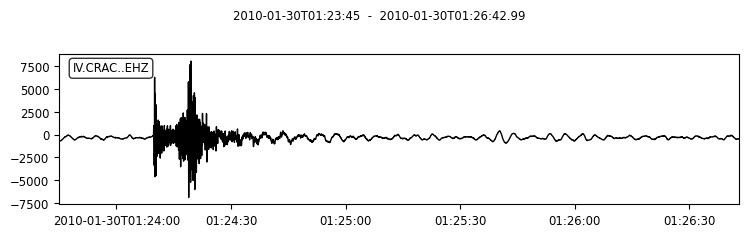

/home/silvia/Documents/GitHub/primoprogetto/venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 30.
  fig.canvas.print_figure(bytes_io, **kw)


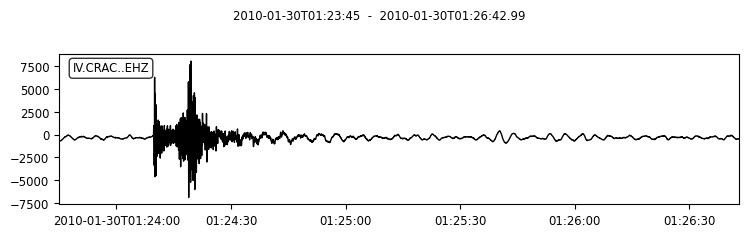

In [14]:
# data_st_read = read("/home/silvia/Desktop/Instance_Undecideble_traces_more_positive_mean_pred_more1to801.sac")
data_st_read = read("/home/silvia/Desktop/Waveforms_Pollino_buone/20100130012400_M2.5/20100130012345.CRAC.EHZ.sac")


print(data_st_read[0].stats)
# data_st_read[0].plot()
# for i in range(9):
data_st_read[0].plot()


AttribDict({'delta': 0.01, 'depmin': -171.0, 'depmax': 199.0, 'scale': 1.0, 'b': 0.0, 'e': 3.99, 'a': 2.0, 'depmen': 1.1075, 'nzyear': 2017, 'nzjday': 254, 'nzhour': 7, 'nzmin': 49, 'nzsec': 2, 'nzmsec': 680, 'nvhdr': 6, 'npts': 400, 'iftype': 1, 'iztype': 9, 'leven': 1, 'lpspol': 1, 'lovrok': 1, 'lcalda': 0, 'kstnm': 'IV', 'khole': 'MTRA', 'kcmpnm': 'EH', 'knetwk': '17028321'})


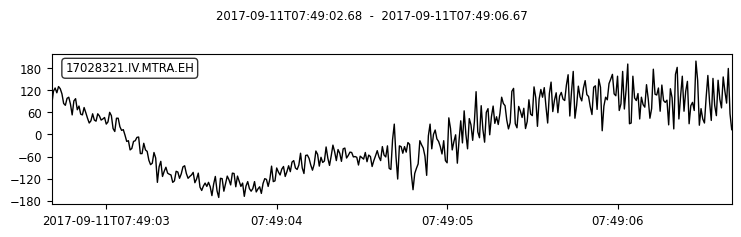

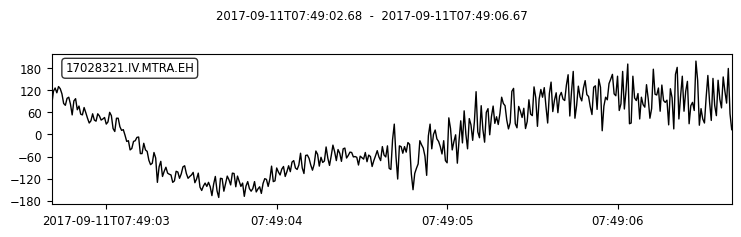

In [4]:
data_st_read = read("/home/silvia/Desktop/Traccia_prova.sac")

print(data_st_read[0].stats.sac)
# data_st_read[0].plot()
# for i in range(9):
data_st_read[0].plot()


In [6]:
%reset